In [9]:
import pandas as pd
from datetime import datetime

#To manually create dates
time_stamp = pd.Timestamp(datetime(2017,1,1))
pd.Timestamp('2017-01-01') == time_stamp
print(time_stamp)
print(time_stamp.year)
print(time_stamp.day_name())


2017-01-01 00:00:00
2017
Sunday


Period object has freq attribute to store freq info

In [23]:
import pandas as pd
from datetime import datetime

period = pd.Period('2017-01')
print(period.day,"days")
print(period.month,"mth")

31 days
1 mth


date arithmetic

In [1]:
import pandas as pd
from datetime import datetime

period = pd.Period('2017-01')
print(period + 2)

2017-03


In [24]:
import pandas as pd
from datetime import datetime

period = pd.Period('2017-01')
period.asfreq('D')

Period('2017-01-31', 'D')

Freq info enables date arithmetic

In [36]:
import pandas as pd
from datetime import datetime

#no longer supported code recommended on DataCamp
pd.Timestamp('2017-01-31', 'M') + 1


C:\Users\bookk\AppData\Local\Temp\ipykernel_18960\3979816053.py:4: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  pd.Timestamp('2017-01-31', 'M') + 1


TypeError: Addition/subtraction of integers and integer-arrays with Timestamp is no longer supported.  Instead of adding/subtracting `n`, use `n * obj.freq`

In [37]:
import pandas as pd
from datetime import datetime

#replace with workable code 
pd.Period('2017-01-31', 'M') + 1


Period('2017-02', 'M')

In [35]:
import pandas as pd
from datetime import datetime

#time series
index = pd.date_range(start='2017-01-01', periods=12, freq='M')
index

DatetimeIndex(['2017-01-31', '2017-02-28', '2017-03-31', '2017-04-30',
               '2017-05-31', '2017-06-30', '2017-07-31', '2017-08-31',
               '2017-09-30', '2017-10-31', '2017-11-30', '2017-12-31'],
              dtype='datetime64[ns]', freq='M')

In [45]:
import pandas as pd1
from datetime import datetime

#time series
index = pd.date_range(start='2017-01-01', periods=12, freq='M')
#time series can be indexed
index[0:3]


DatetimeIndex(['2017-01-31', '2017-02-28', '2017-03-31'], dtype='datetime64[ns]', freq='M')

In [1]:
import pandas as pd
from datetime import datetime

#time series
index = pd.date_range(start='2017-01-01', periods=12, freq='M')
#time series can be indexed to period
index.to_period()

PeriodIndex(['2017-01', '2017-02', '2017-03', '2017-04', '2017-05', '2017-06',
             '2017-07', '2017-08', '2017-09', '2017-10', '2017-11', '2017-12'],
            dtype='period[M]')

ns means nanoseconds

In [2]:
pd.DataFrame({'date': index}).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    12 non-null     datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 224.0 bytes


create 12 rows, 2 columns timestamp series

In [9]:
import pandas as pd
import numpy as np
from datetime import datetime

data = np.random.random((12,2))
pd.DataFrame(data = data, index=index).info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 12 entries, 2017-01-31 to 2017-12-31
Freq: M
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       12 non-null     float64
 1   1       12 non-null     float64
dtypes: float64(2)
memory usage: 288.0 bytes


In [21]:
import pandas as pd
import numpy as np
from datetime import datetime

# Create the range of dates here
seven_days = pd.date_range(start='2017-01-01', periods=7, freq='D')

# Iterate over the dates and print the number and name of the weekday
for day in seven_days:
    print(day.dayofweek, day.day_name())

6 Sunday
0 Monday
1 Tuesday
2 Wednesday
3 Thursday
4 Friday
5 Saturday


DateTimeIndex: Upsampling=> incr freq, downsampling=> decr freq

In [2]:
from datetime import datetime
import datetime as dt
import pandas_datareader.data as pdr
import yfinance as yf

yf.pdr_override()
#convert to datetime64
y_symbols = ['GOOGL']
from datetime import datetime
startdate = datetime(2015,1,1)
enddate = datetime.now()
google = pdr.get_data_yahoo(y_symbols,start=startdate, end=enddate)

google.info()

#don't create copy
google.set_index('date', inplace=True)
google.info()

#selecting/indexing strings that parse to dates
google['2015'].info() #Pass string for part of date
google['2015-3':'2016-2'].info() #Slice includes last month

#select specific stock price
google.loc['2016-6-1','price'] #Use full date with .loc[] 

#Convert DateTimeIndex to calendar day freq
google.asfreq('D').info() #set day freq

#Upsampling: higher feq => new dates => missing data
google.asfreq('D').head()

#Convert DateTimeIndex to biz day feq
google = google.asfreq('B') #Change to calendar day feq
google.info()


[*********************100%***********************]  1 of 1 completed
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2133 entries, 2015-01-02 to 2023-06-23
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       2133 non-null   float64
 1   High       2133 non-null   float64
 2   Low        2133 non-null   float64
 3   Close      2133 non-null   float64
 4   Adj Close  2133 non-null   float64
 5   Volume     2133 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 116.6 KB


KeyError: "None of ['date'] are in the columns"

my code & interpretation

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    7 non-null      object 
 1   ozone   7 non-null      float64
 2   pm25    7 non-null      float64
 3   co      7 non-null      float64
dtypes: float64(3), object(1)
memory usage: 352.0+ bytes
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    7 non-null      datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 184.0 bytes
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    7 non-null      object 
 1   ozone   7 non-null      float64
 2   pm25    7 non-null      float64
 3   co      7 non-null      float64
dtypes: fl

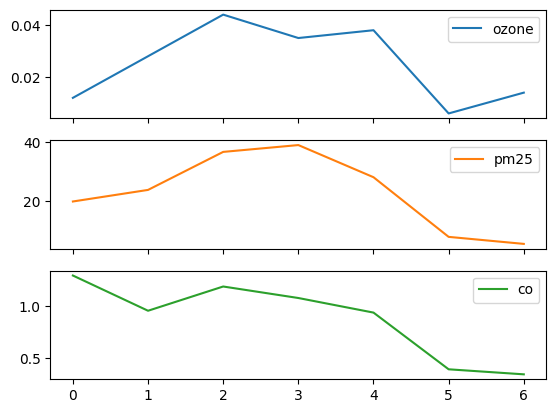

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

data = pd.read_csv('nyc.csv')
# Inspect data
print(data.info())
# Convert the date column to datetime64
index = pd.to_datetime(data['date'])
# Set date column as index
pd.DataFrame({'date': index}).info()

# Inspect data 
print(data.info())

# Plot data
#date = data['date']
#study = data['ozone']
#plt.plot(date, study)
data.plot(subplots=True)
plt.show()


Datacamp's code

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    7 non-null      object 
 1   ozone   7 non-null      float64
 2   pm25    7 non-null      float64
 3   co      7 non-null      float64
dtypes: float64(3), object(1)
memory usage: 352.0+ bytes
None
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 7 entries, 1999-07-01 to 1999-07-07
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ozone   7 non-null      float64
 1   pm25    7 non-null      float64
 2   co      7 non-null      float64
dtypes: float64(3)
memory usage: 224.0 bytes
None


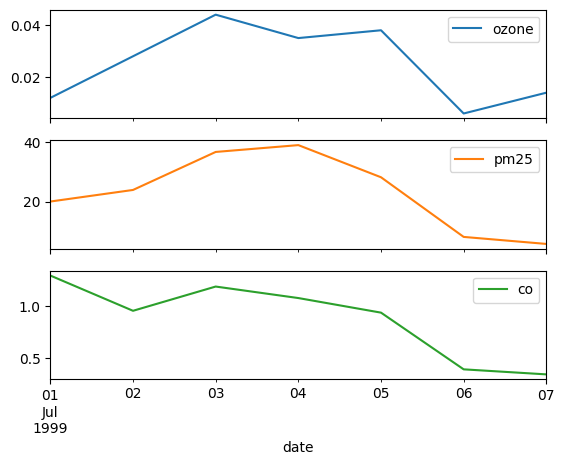

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

data = pd.read_csv('nyc.csv')
# Inspect data
print(data.info())
# Convert the date column to datetime64
data.date = pd.to_datetime(data.date)
# Set date column as index
data.set_index('date', inplace=True)

# Inspect data 
print(data.info())

# Plot data
data.plot(subplots=True)
plt.show()


[*********************100%***********************]  1 of 1 completed


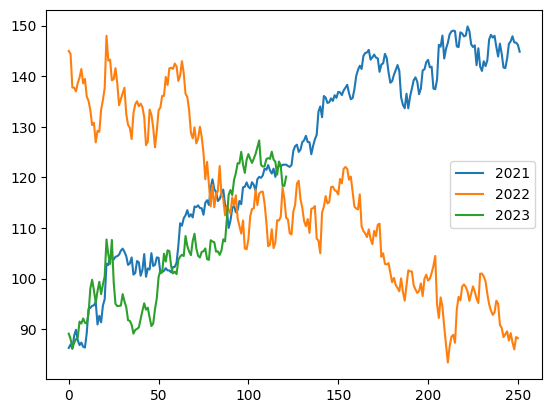

In [4]:
import datetime as dt
import pandas_datareader.data as pdr
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

#solve string problem
yf.pdr_override()
#starting setup
y_symbols = ['GOOGL']
from datetime import datetime
startdate = datetime(2007,1,1)
enddate = datetime.now()
google = pdr.get_data_yahoo(y_symbols,start=startdate, end=enddate)
# Create dataframe prices here
prices = pd.DataFrame()
#prices

# Select data for each year and concatenate with prices here 
for year in ['2021','2022','2023']:
    price_per_year = google.loc[year, ['Close']].reset_index(drop=True)
    price_per_year.rename(columns={'Close': year}, inplace=True)
    prices = pd.concat([prices, price_per_year], axis=1)

# Plot prices
prices.plot()
plt.show()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         24 non-null     object 
 1   Chicago      24 non-null     float64
 2   Los Angeles  24 non-null     float64
 3   New York     24 non-null     float64
dtypes: float64(3), object(1)
memory usage: 896.0+ bytes
None
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 24 entries, 2005-01-01 to 2006-01-12
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Chicago      24 non-null     float64
 1   Los Angeles  24 non-null     float64
 2   New York     24 non-null     float64
dtypes: float64(3)
memory usage: 768.0 bytes
None


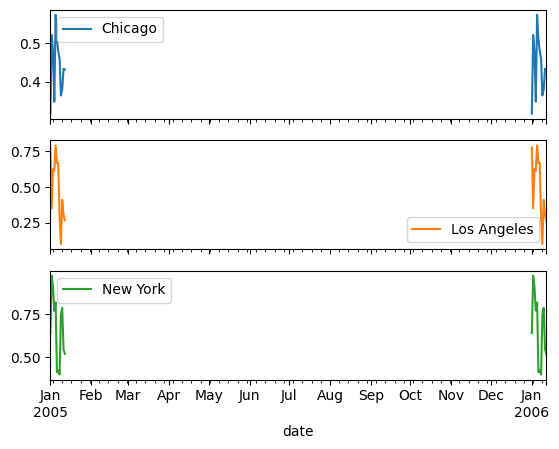

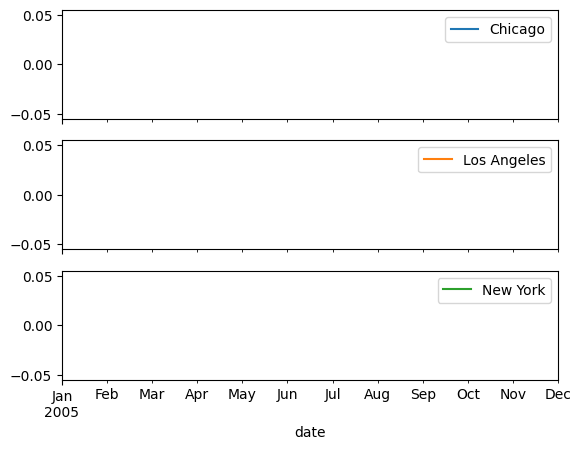

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

co = pd.read_csv('co_cities.csv')
# Inspect data
print(co.info())
# Convert the date column to datetime64
co.date = pd.to_datetime(co.date)
# Set date column as index
co.set_index('date', inplace=True)

# Inspect data 
print(co.info())

# Set the frequency to calendar daily
co = co.asfreq('D')

# Plot the co
co.plot(subplots=True)
plt.show()


# Set frequency to monthly
co = co.asfreq('M')

# Plot the co
co.plot(subplots=True)
plt.show()



.shift()
Shifting values back & forth in time;
Get the difference for the period;
Compute the % change for the periods;


In [14]:
import datetime as dt
import pandas_datareader.data as pdr
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

#solve string problem
yf.pdr_override()
#starting setup
y_symbols = ['GOOGL']
from datetime import datetime
startdate = datetime(2007,1,1)
enddate = datetime(2007,1,31)
google = pdr.get_data_yahoo(y_symbols,start=startdate, end=enddate)

# Create dataframe prices here

#shifting periods
google['shifted'] = google.Close.shift() #default: periods=1 forward
google['lagged'] = google.Close.shift(periods=-1) #1period back in time
google[['Close','shifted','lagged']]

[*********************100%***********************]  1 of 1 completed


,Close,shifted,lagged
Date,,,
2007-01-03,11.701451,NaN,12.093594
2007-01-04,12.093594,11.701451,12.191942
2007-01-05,12.191942,12.093594,12.101602
2007-01-08,12.101602,12.191942,12.149650
2007-01-09,12.149650,12.101602,12.248749
2007-01-10,12.248749,12.149650,12.505506
2007-01-11,12.505506,12.248749,12.637638
2007-01-12,12.637638,12.505506,12.619620
2007-01-16,12.619620,12.637638,12.444444


In [15]:
#call Financial Return
#calculate Rate of Change x**t / x**t-1
google['change'] = google.Close.div(google.shifted)
google[['Close','shifted','change']].head()

,Close,shifted,change
Date,,,
2007-01-03,11.701451,NaN,NaN
2007-01-04,12.093594,11.701451,1.033512
2007-01-05,12.191942,12.093594,1.008132
2007-01-08,12.101602,12.191942,0.992590
2007-01-09,12.149650,12.101602,1.003970


In [16]:
#calculate one-period percent change
google['return'] = google.change.sub(1).mul(100)
google[['Close','shifted','change','return']].head()

,Close,shifted,change,return
Date,,,,
2007-01-03,11.701451,NaN,NaN,NaN
2007-01-04,12.093594,11.701451,1.033512,3.351228
2007-01-05,12.191942,12.093594,1.008132,0.813229
2007-01-08,12.101602,12.191942,0.992590,-0.740986
2007-01-09,12.149650,12.101602,1.003970,0.397039


In [17]:
#.diff() difference in value for 2 adjacent periods x**t - x**t-1
google['diff'] = google.Close.diff()
google[['Close','diff']].head()

,Close,diff
Date,,
2007-01-03,11.701451,NaN
2007-01-04,12.093594,0.392142
2007-01-05,12.191942,0.098349
2007-01-08,12.101602,-0.090341
2007-01-09,12.149650,0.048048


In [20]:
# .pct_change() percent change for two adjacent periods x**t/x**t-1
google['pct_change'] = google.Close.pct_change().mul(100)
google[['Close','return','pct_change']].head()

,Close,return,pct_change
Date,,,
2007-01-03,11.701451,NaN,NaN
2007-01-04,12.093594,3.351228,3.351228
2007-01-05,12.191942,0.813229,0.813229
2007-01-08,12.101602,-0.740986,-0.740986
2007-01-09,12.149650,0.397039,0.397039


In [21]:
#google points several periods apart
google['return_3d'] = google.Close.pct_change(periods=3).mul(100)
google[['Close','return_3d']].head()

,Close,return_3d
Date,,
2007-01-03,11.701451,NaN
2007-01-04,12.093594,NaN
2007-01-05,12.191942,NaN
2007-01-08,12.101602,3.419664
2007-01-09,12.149650,0.463518


[*********************100%***********************]  1 of 1 completed


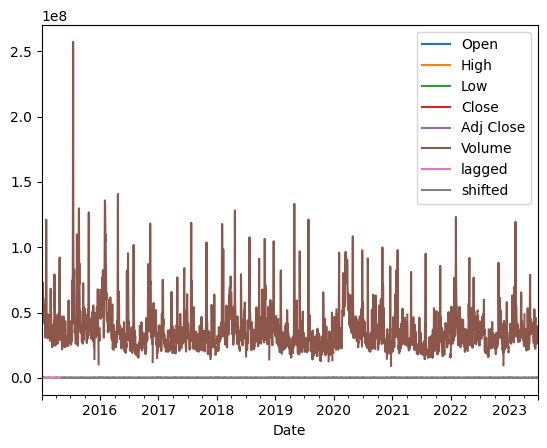

In [43]:
import datetime as dt
import pandas_datareader.data as pdr
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

#solve string problem
yf.pdr_override()
#starting setup
y_symbols = ['GOOGL']
from datetime import datetime
startdate = datetime(2015,1,1)
enddate = datetime.now()
google = pdr.get_data_yahoo(y_symbols,start=startdate, end=enddate ) 

# Create dataframe prices here
prices = pd.DataFrame()

# Set data frequency to business daily
google = google.asfreq('B')

# Create 'lagged' and 'shifted'
google['lagged'] = google.Close.shift(periods=-90)
google['shifted'] = google.Close.shift(periods=90)


# Plot the google price series
google.plot()
plt.show()



In [42]:
import datetime as dt
import pandas_datareader.data as pdr
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

#solve string problem
yf.pdr_override()
#starting setup
y_symbols = ['GOOGL']
from datetime import datetime
startdate = datetime(2015,1,1)
enddate = datetime.now()
google = pdr.get_data_yahoo(y_symbols,start=startdate, end=enddate ) 

# Create dataframe prices here
prices = pd.DataFrame()

# Create shifted_30 here
google['shifted_30'] = google.Close.shift(30)

# Subtract shifted_30 from price
google['change_30'] =google.Close.sub(google.shifted_30)

# Get the 30-day price difference
google['diff_30'] =google.Close.diff(30)

# Inspect the last five rows of price
print(google.tail())

# Show the value_counts of the difference between change_30 and diff_30
print(google.change_30.sub(google.diff_30).value_counts())



[*********************100%***********************]  1 of 1 completed
                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2023-06-22  120.000000  123.239998  118.830002  123.150002  123.150002   
2023-06-23  121.379997  122.790001  121.059998  122.339996  122.339996   
2023-06-26  120.760002  122.000000  118.269997  118.339996  118.339996   
2023-06-27  117.080002  119.080002  116.099998  118.330002  118.330002   
2023-06-28  117.089996  120.389999  116.849998  120.180000  120.180000   

              Volume  shifted_30  change_30    diff_30  
Date                                                    
2023-06-22  26952200  107.349998  15.800003  15.800003  
2023-06-23  34885300  111.750000  10.589996  10.589996  
2023-06-26  33969900  116.570000   1.769997   1.769997  
2023-06-27  39535900  117.510002   0.820000   0.820000  
2023-06-28  27067800  116.510002   3.669998   3.669998  
0.0    2106
d

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 36 entries, 2000-01-01 to 2002-12-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   UNRATE  36 non-null     float64
dtypes: float64(1)
memory usage: 576.0 bytes
None


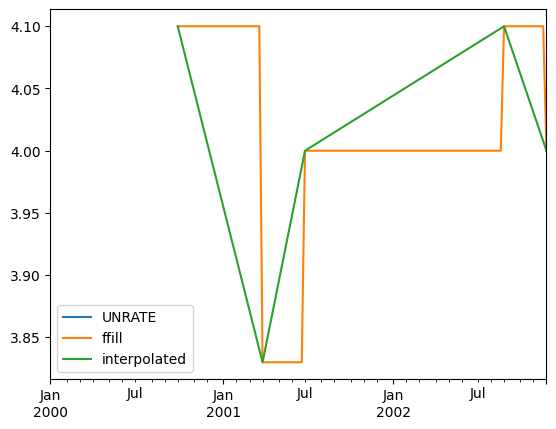

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt

# Import data here
monthly = pd.read_csv('UNRATE.csv', parse_dates=['date'], index_col='date')
#unrate = pd.read_csv('unemployment.csv', parse_dates=['date'], index_col='date')

# Inspect data here
print(monthly.info())

# Create weekly dates
weekly_dates = pd.date_range(monthly.index.min(), monthly.index.max(), freq='W')

# Reindex monthly to weekly data
weekly = monthly.reindex(weekly_dates)

# Create ffill and interpolated columns
weekly['ffill'] = weekly.UNRATE.ffill()
weekly['interpolated'] = weekly.UNRATE.interpolate()

# Plot weekly
weekly.plot()
plt.show()

[*********************100%***********************]  2 of 2 completed


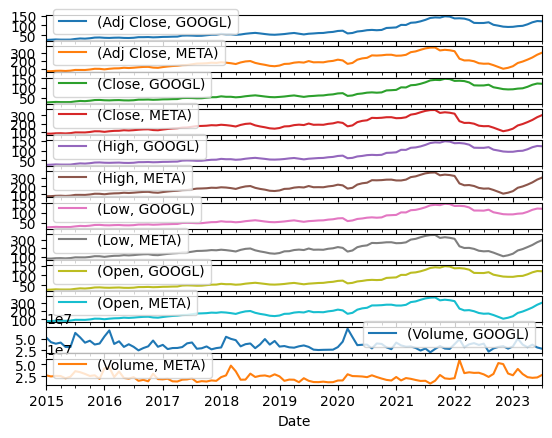

In [15]:
import datetime as dt
import pandas_datareader.data as pdr
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

#solve string problem
yf.pdr_override()
#starting setup
tickers = ['GOOGL', 'META']
from datetime import datetime
startdate = datetime(2015,1,1)
enddate = datetime.now()
stocks = pdr.get_data_yahoo(tickers,start=startdate, end=enddate ) 

# Import and inspect data here
#stocks = pd.read_csv('stocks.csv', parse_dates=['date'], index_col='date')
#print(stocks.info())
#prices=pd.DataFrame()
# Select data for each year and concatenate with prices here 

# Calculate and plot the monthly averages
monthly_average = stocks.resample('M').mean()
monthly_average.plot(subplots=True);
plt.show();


